<a href="https://colab.research.google.com/github/xogus2171-coder/DEU-Project/blob/main/final_exam_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br><br>

# Problem 04

Having explored the implementation of a CNN using the MNIST dataset - a simple and well-structured benchmark - we now shift our focus to a more practical and realistic problem in an everyday setting. In this case, we will explore a bakery scenario where customers select various types of bread. The goal is to develop a CNN-based algorithm that automatically scans the selected bread using a camera, classifies it, and predicts its price.

<br>

- Download [bread_train_images.npy](https://drive.google.com/file/d/1Pd6CuU32mM-nViYJYDhfeF8XQ3WiuwpE/view?usp=sharing)
- Download [bread_train_labels.npy](https://drive.google.com/file/d/1GToWUxkKvv8VHH2N-1EkJMcbab7qFqtM/view?usp=sharing)
- Download [bread_test_images.npy](https://drive.google.com/file/d/1xRKeHPoY30WDzrmx_jJ3MceKuvxAesBk/view?usp=sharing)
- Download [bread_test_labels.npy](https://drive.google.com/file/d/147lNpv9H7-aFGcpHgbeCUsRlyTA91JJ0/view?usp=sharing)

<br>

<center>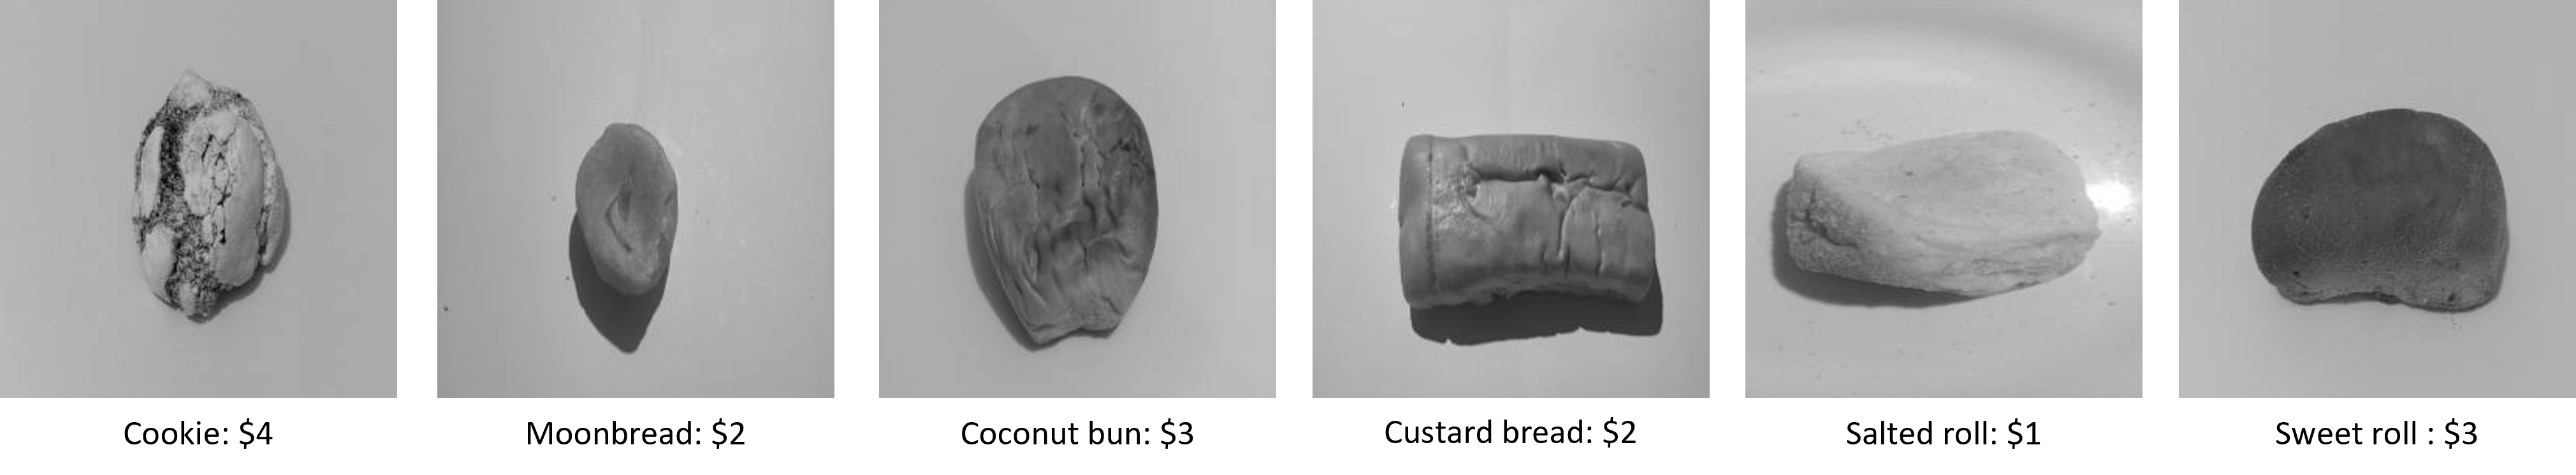</center>

In [1]:
from google.colab import drive #구글 드라이브 마운트
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt #라이브러리 불러오기

In [3]:
import os
os.path.exists('/content/drive')
os.path.exists('/content/drive/MyDrive') #구글 드라이브 마운트 확인

True

In [4]:
os.listdir('/content/drive/MyDrive') #데이터 저장 경로 확인

['final exam_Problem 2.ipynb',
 '코랩',
 'Colab Notebooks',
 'Chapter7.ipynb',
 'Untitled (1)',
 'ML',
 'DL_Colab',
 'Untitled',
 'final exam_Problem 1']

In [5]:
# change file paths if necessary #데이터 업로드

train_x = np.load('/content/drive/MyDrive/ML/ML_data/bread_train_images.npy')
train_y = np.load('/content/drive/MyDrive/ML/ML_data/bread_train_labels.npy')

test_x = np.load('/content/drive/MyDrive/ML/ML_data/bread_test_images.npy')
test_y = np.load('/content/drive/MyDrive/ML/ML_data/bread_test_labels.npy')

In [6]:
print(train_x.shape) #데이터 형태 확인
print(train_y.shape)

(5177, 256, 256, 1)
(5177,)


In [7]:
print(test_x.shape) #데이터 형태 확인
print(test_y.shape)

(329, 256, 256, 1)
(329,)


<br>

(1) Develop a CNN model for classifying different types of bread.

In [8]:
## write your code here

import keras
import numpy as np
from keras import models
from keras import layers
from keras import Sequential
from keras.utils import to_categorical #라이브러리 불러오기

In [9]:
model = Sequential([     #합성곱 신경망 만들기
    layers.Conv2D(32, (3,3), activation='relu', #첫 번째 합성곱 층 Conv2D 만들기
                  input_shape=train_x.shape[1:]),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'), #두 번째 합성곱 층 Conv2D 만들기
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'), #세 번째 합성곱 층 Conv2D 만들기
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), #드롭아웃 층 추가, 과대적합을 막고 성능 개선
    layers.Dense(6, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
from tensorflow.keras.utils import to_categorical
name = ['Cookie', 'Moonbread', 'Coconut bun', 'Custard bread', 'Salted roll', 'Sweet roll']
num_classes = len(name)
train_y = to_categorical(train_y, num_classes) #라벨 원 핫 인코딩
test_y  = to_categorical(test_y, num_classes)

In [11]:
## write your code here
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #모델 훈련

In [12]:
history = model.fit(train_x, train_y, epochs=5, validation_data=(test_x, test_y)) #모델 훈련

Epoch 1/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 820s 5s/step - accuracy: 0.6186 - loss: 1.0867 - val_accuracy: 0.9179 - val_loss: 0.2855
Epoch 2/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 814s 5s/step - accuracy: 0.8978 - loss: 0.2955 - val_accuracy: 0.9726 - val_loss: 0.1144
Epoch 3/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 820s 5s/step - accuracy: 0.9387 - loss: 0.1891 - val_accuracy: 0.9574 - val_loss: 0.1270
Epoch 4/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 812s 5s/step - accuracy: 0.9535 - loss: 0.1412 - val_accuracy: 0.9696 - val_loss: 0.0776
Epoch 5/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 797s 5s/step - accuracy: 0.9699 - loss: 0.1005 - val_accuracy: 0.9818 - val_loss: 0.0615


<br>

(2) Randomly select one image of bread and evaluate it using the trained CNN model.

In [13]:
## write your code here
class_names = ['Cookie', 'Moonbread', 'Coconut bun', 'Custard bread', 'Salted roll', 'Sweet roll'] #클래스 네임 설정
import numpy as np
import matplotlib.pyplot as plt #라이브러리 불러오기

idx = np.random.randint(0, test_x.shape[0]) #랜덤한 인덱스 선택

sample_img = test_x[idx]
true_label = np.argmax(test_y[idx])

In [14]:
pred = model.predict(sample_img[np.newaxis, ...]) #모델 예측하기
pred_label = np.argmax(pred)
confidence = np.max(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


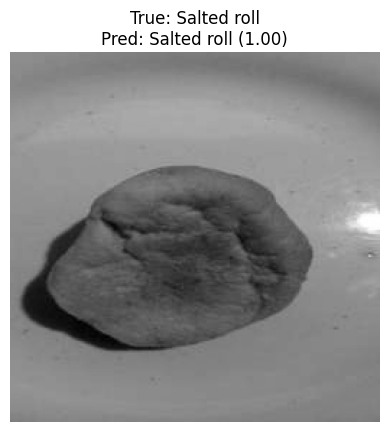

In [15]:
plt.imshow(sample_img.squeeze(), cmap='gray') #이미지와 빵 이름 확인하기
plt.axis('off')
plt.title(f"True: {class_names[true_label]}\n" f"Pred: {class_names[pred_label]} ({confidence:.2f})")
plt.show()

<br>

(3) Randomly select five images of bread and predict the price of each, as well as the total price.

In [16]:
## write your code here
import numpy as np #라이브러리 불러오기
import matplotlib.pyplot as plt

In [17]:
class_names = ['Cookie', 'Moonbread', 'Coconut bun', 'Custard bread', 'Salted roll', 'Sweet roll'] #클래스 네임 설정
num_classes = len(class_names)
prices = {
    'Cookie': 4,
    'Moonbread': 2,
    'Coconut bun': 3,
    'Custard bread': 2,
    'Salted roll': 1,
    'Sweet roll': 3} #빵의 가격을 설정하기

In [18]:
import numpy as np #라이브러리 불러오기
import matplotlib.pyplot as plt #라이브러리 불러오기

num_samples = 5
indices = np.random.choice(len(test_x), num_samples, replace=False)

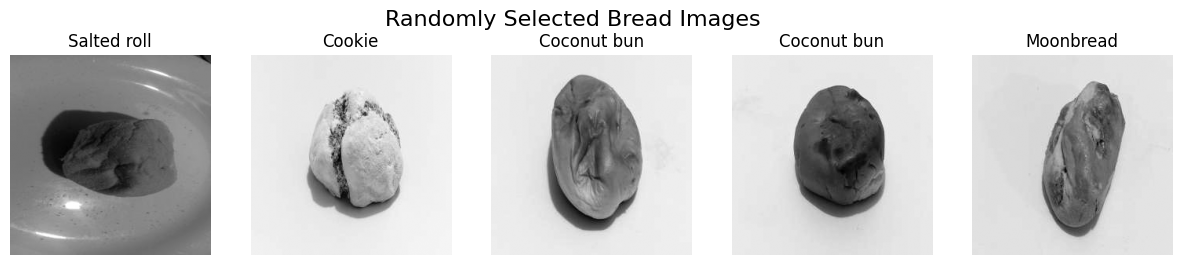

In [20]:
random_idx = np.random.choice(len(test_x), size=5, replace=False) #5개의 랜덤 이미지 출력

plt.figure(figsize=(15, 3))

for i, idx in enumerate(random_idx):
    plt.subplot(1, 5, i + 1)
    img = test_x[idx]

    plt.imshow(img.squeeze(), cmap='gray') # 이미지 출력
    plt.axis('off')

    if test_y.ndim == 2:  # 정답 라벨 처리 # one-hot encoding
        true_label = np.argmax(test_y[idx])
    else:
        true_label = test_y[idx]

    plt.title(class_names[true_label])

plt.suptitle("Randomly Selected Bread Images", fontsize=16)
plt.show()

In [21]:
pred_probs = model.predict(test_x[random_idx])   # (선택된 5개 이미지 예측)
pred_labels = np.argmax(pred_probs, axis=1)

total_price = 0
individual_prices = [] #가격 계산

for pred in pred_labels:
    bread_name = class_names[pred]
    bread_price = prices[bread_name]

    individual_prices.append((bread_name, bread_price))
    total_price += bread_price

print("Individual prices:")
for name, price in individual_prices:
    print(f"{name}: ${price}")

print(f"\nTotal price: ${total_price}") #결과 출력


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
Individual prices:
Salted roll: $1
Cookie: $4
Coconut bun: $3
Coconut bun: $3
Moonbread: $2

Total price: $13
